Classification in ML is define as the technique to identify the category of new observation based on training data  

example : cat n dog /// email is spam or not

simple formalua : ln(p / (1 - p)) = b0 + b1x

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [70]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[ : ,: -1].values
Y = dataset.iloc[  :, -1].values

In [71]:
print("X : " , X)
print("Y : ", Y)

X :  [[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22 

Training Set and the Test set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


Feature scaling
making the data values difference equal

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)  #building the model
classifier.fit(X_train, Y_train.ravel()) #training the model


LogisticRegression(random_state=0)

Predict the New Result

In [ ]:
#classifier.predict([[30,00]])# this will give the wrong result we need to feature scale. this is the original values
#classifier.predict(sc.transform([[30,87000]]))
# this is only on the single input 
# classifier.predict(sc.t ransform([[30,87000]]))
print(classifier.predict(sc.transform([[30,87000]])))

array([0], dtype=int64)

Predicting the test set results

In [89]:
X_predict = classifier.predict(X_test)

Predict vs original

In [ ]:
    # Set print precision
    np.set_printoptions(precision=2)

    # Make sure both are 2D arrays with the same number of rows
    # Reshape if necessary
    Y_test = Y_test.reshape(-1, 1)
    X_predict = X_predict.reshape(-1, 1)

    # Concatenate along columns (axis=1)
    results = np.concatenate((Y_test, X_predict), axis=1)

    # Print results
    print(results)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]]


Confusion Matrix -- help in checking the model

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , X_predict) 
print(cm)

[[65  3]
 [ 8 24]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test , X_predict) #this will give the number 

0.89

Visualising graph

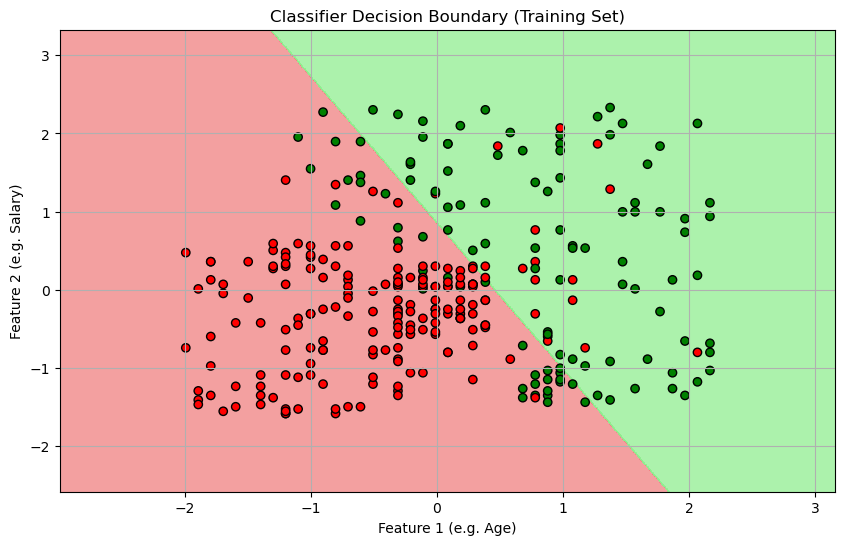

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assume you already have: X_train, Y_train, classifier

# Create meshgrid
X_set, y_set = X_train, Y_train.ravel()
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('lightcoral', 'lightgreen')))

# Plot training points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolor='k')

plt.title('Classifier Decision Boundary (Training Set)')
plt.xlabel('Feature 1 (e.g. Age)')
plt.ylabel('Feature 2 (e.g. Salary)')
plt.grid(True)
plt.show()


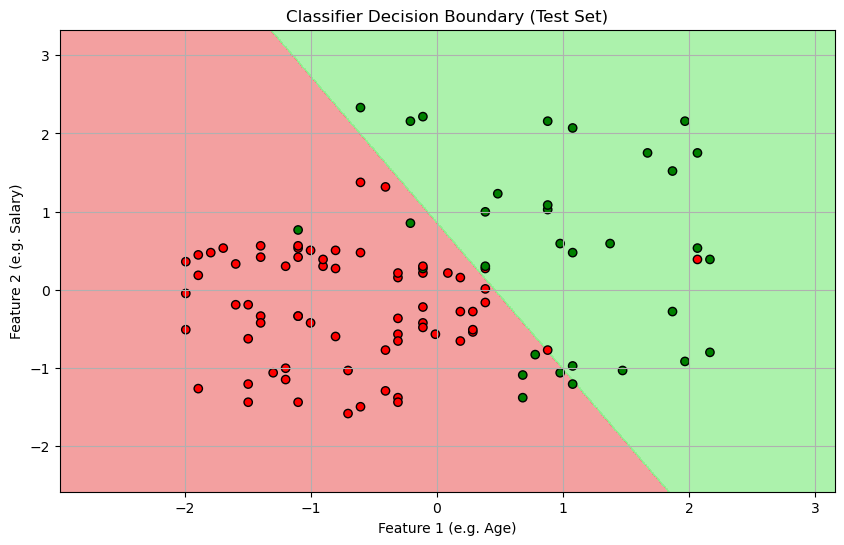

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assume you already have: X_train, Y_train, classifier

# Create meshgrid
X_set, y_set = X_test, Y_test.ravel()
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('lightcoral', 'lightgreen')))

# Plot training points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolor='k')

plt.title('Classifier Decision Boundary (Test Set)')
plt.xlabel('Feature 1 (e.g. Age)')
plt.ylabel('Feature 2 (e.g. Salary)')
plt.grid(True)
plt.show()


AT THE END : 

    the logistic Regression model is doing the beautiful job to predict the classes
    and seperating them by the line/ boundary -- linear
    SO we need the more classifiers 